# Estudo de Caso - Marketing 

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
bd_cartao = pd.read_csv("GENERAL.csv")

In [3]:
bd_cartao.shape

(8950, 18)

In [4]:
bd_cartao.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
bd_cartao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
bd_cartao.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Visualização e Exploração dos dados

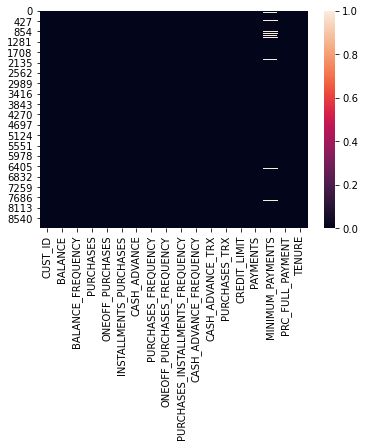

In [7]:
# Olhando no mapa de calor pra ver quais dados estão faltando na base de dados
sns.heatmap(bd_cartao.isnull());

In [8]:
bd_cartao.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Preenchendo com a media dos valores(Pagamentos minimos) as linhas em branco
bd_cartao['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [10]:
bd_cartao.loc[(bd_cartao['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = bd_cartao['MINIMUM_PAYMENTS'].mean()

In [11]:
bd_cartao['CREDIT_LIMIT'].mean()

4494.449450364621

In [12]:
bd_cartao.loc[(bd_cartao['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = bd_cartao['CREDIT_LIMIT'].mean()

In [13]:
bd_cartao.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

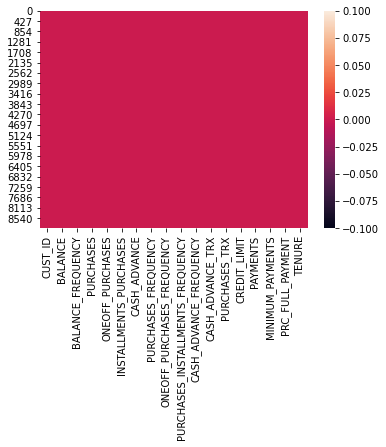

In [14]:
sns.heatmap(bd_cartao.isnull());

In [15]:
bd_cartao.duplicated().sum()

0

In [16]:
# Retirando a coluna CUST_ID -- não é de valia para a análise
bd_cartao.drop('CUST_ID', axis = 1, inplace = True)

In [17]:
bd_cartao.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
# COnferindo a qnt de clunas
len(bd_cartao.columns)

17

C:\Users\zerom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zerom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zerom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

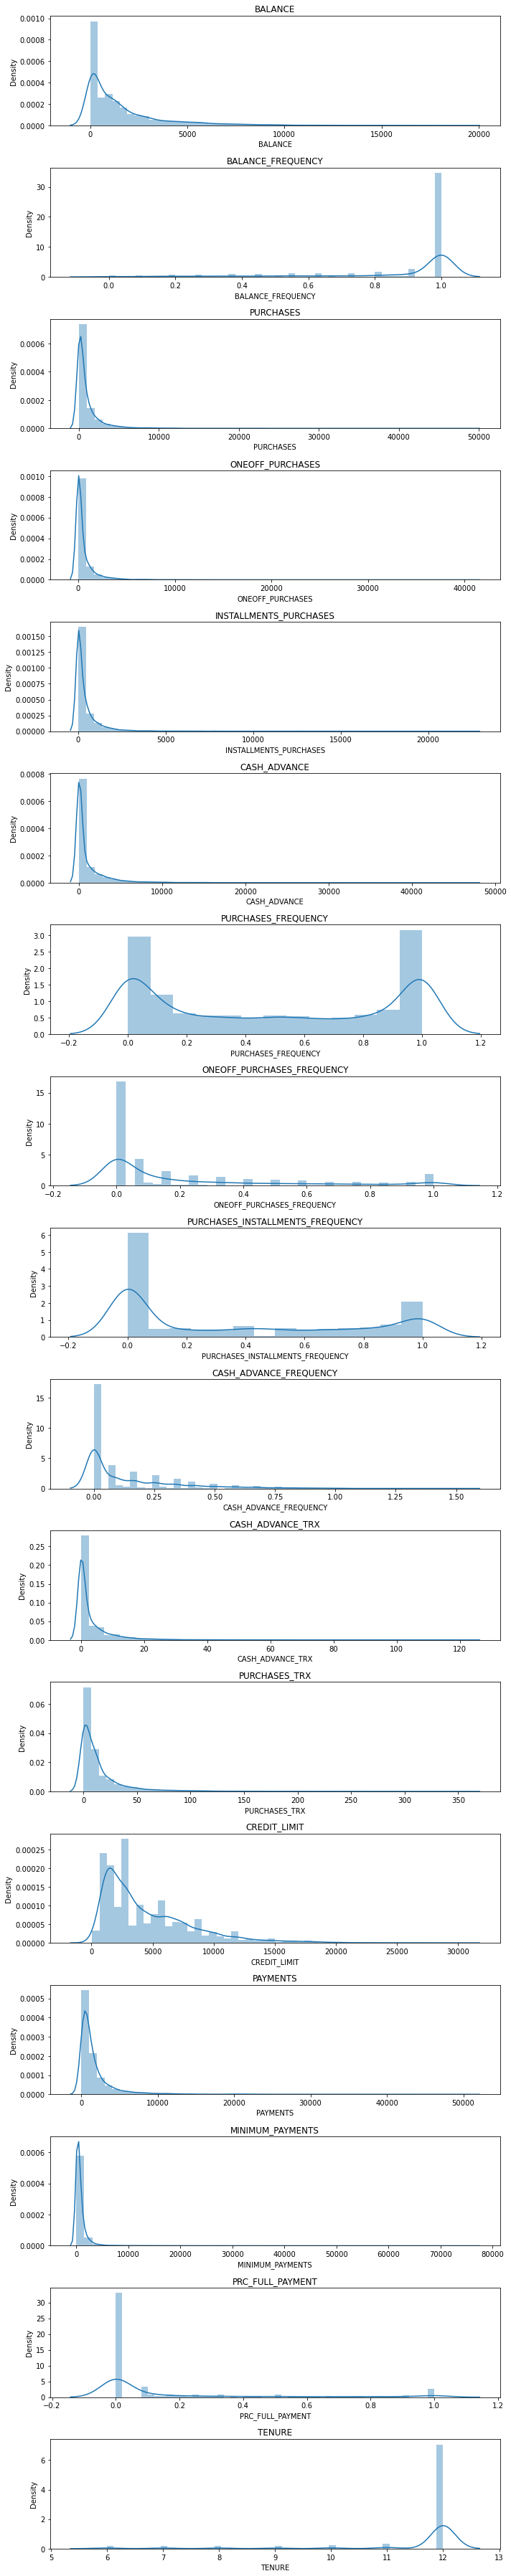

In [19]:
# Criando uma figura tipo istograma para cada coluna
# Com isso vamos fazer um FOR para percorrer todas as colunas e gerar a figura
plt.figure(figsize = (10,50))

for i in range(len(bd_cartao.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(bd_cartao[bd_cartao.columns[i]], kde = True)
    plt.title(bd_cartao.columns[i])

    plt.tight_layout(); # organizando os titulos dos graficos

In [20]:
# Criando um mapa de Correlação entre os dados
correlacao = bd_cartao.corr() 

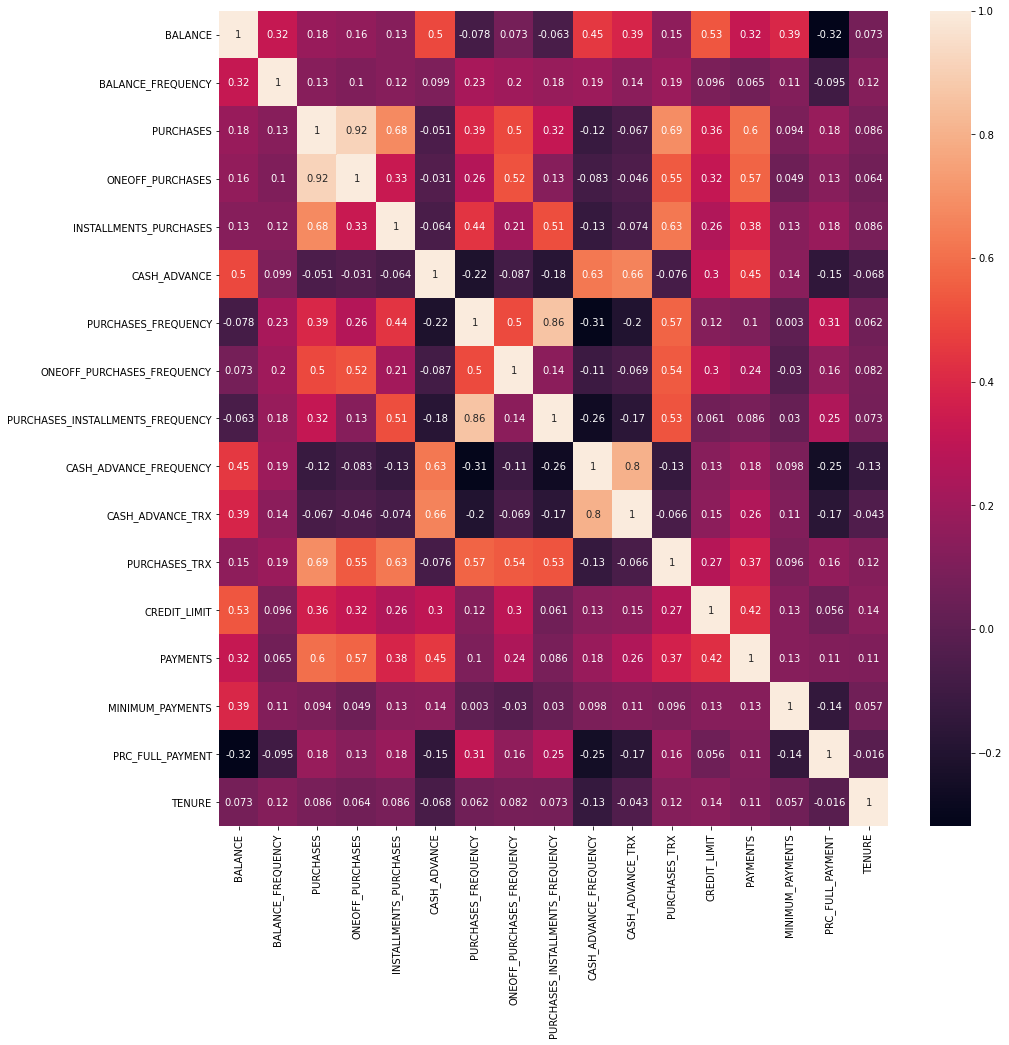

In [21]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlacao, annot = True);

# Definição do número de clusters usando o Elbow Method

<p style='text-align: justify;'> 
Na análise de cluster, o método Elbow (cotovelo) é uma heurística usada para determinar o número de clusters em um conjunto de dados. O método consiste em representar graficamente a variação explicada em função do número de clusters e escolher o Elbow (cotovelo) da curva como o número de clusters a utilizar. O mesmo método pode ser usado para escolher o número de parâmetros em outros modelos orientados a dados, como o número de componentes principais para descrever um conjunto de dados.
</p>

<h1> Elbow Method for optimal value of k in KMeans </h1>

<p style = 'text-align: justify;'>
Uma etapa fundamental para qualquer algoritmo não supervisionado é determinar o número ideal de clusters nos quais os dados podem ser agrupados. O método do cotovelo é um dos métodos mais populares para determinar o valor ideal de k.
Agora demonstramos o método fornecido usando a técnica de agrupamento K-Means usando a biblioteca Sklearn de python.
</p>

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

<p>
Para o Método de grupos K-Means, os registros são agrupados baseados em atributos similares, por meio de um cálculo de distância euclidiana. Não exite a idéia de previsão para os dados.    
</p>

In [22]:
# Calculando os valores minimo e o maximo
min(bd_cartao['BALANCE']), max(bd_cartao['BALANCE'])

(0.0, 19043.13856)

In [23]:
# Essa diferencvia é muito grande, então iremos agrupar os valores em 
# uma escalar menor e de valores mais próximos
# essa redução na escala é obrigatória para o K-means
escala = StandardScaler()
bd_cartao_escalonado = escala.fit_transform(bd_cartao)

In [24]:
type(bd_cartao_escalonado), type(bd_cartao)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [25]:
# Conferindo se deu certa a redução das escalas
min(bd_cartao_escalonado[0]), max(bd_cartao_escalonado[0])

(-0.9604333444542572, 0.36067954425377496)

In [26]:
bd_cartao_escalonado

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [27]:
# Fazendo o teste para o numero ideal de clusters
wcss_1 = []
alcance_valores = range(1, 20)
for i in alcance_valores:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(bd_cartao_escalonado)
    wcss_1.append(kmeans.inertia_)

print(wcss_1)

[152149.99999999878, 127785.36931931238, 111986.79781111241, 99074.344749936, 91503.04779640742, 84855.7606064203, 79635.62655613208, 74490.98289096978, 69858.8055804556, 66502.51064598386, 63638.55123919377, 61364.67995623213, 59165.66861031444, 57462.661221549344, 55918.98625675337, 54582.47558580776, 53330.934560340276, 51636.68931751041, 50883.48901421483]


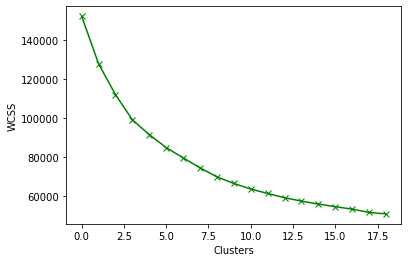

In [28]:
# Imprimindo o grafico pra descobrir a quantidade de Clusters
plt.plot(wcss_1, 'gx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

<h1> Agrupamento com K-MEANS 

In [29]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(bd_cartao_escalonado)
labels = kmeans.labels_
#.fit - função de treinamento

In [30]:
# conferindo se não tem erro
labels, len(labels)

(array([0, 3, 1, ..., 6, 6, 6]), 8950)

In [31]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2745, 1120,  364,  886, 1181,   25,  625, 2004], dtype=int64))

In [32]:
kmeans.cluster_centers_
# nesse saída mostra os 8 vetores com as medias de cada uma das colunas
# dentro de cada clusters

array([[ 8.10022755e-03,  4.03529050e-01, -3.55758776e-01,
        -2.40643823e-01, -3.98971099e-01, -1.02187979e-01,
        -8.48372637e-01, -3.92990858e-01, -7.50971844e-01,
         9.02928232e-02, -3.73158802e-02, -4.79980369e-01,
        -3.06983243e-01, -2.53017289e-01, -1.22383680e-02,
        -4.56234609e-01,  2.73873303e-01],
       [-1.42210457e-01,  3.99946682e-01,  5.38931335e-01,
         6.68972132e-01,  4.50942821e-02, -3.32281482e-01,
         9.79740104e-01,  1.90522560e+00,  1.67605493e-01,
        -4.15524234e-01, -3.32938667e-01,  6.14927806e-01,
         4.26302240e-01,  1.42181770e-01, -1.60034991e-01,
         4.50258221e-01,  2.69194252e-01],
       [ 1.05599373e+00,  4.68427063e-01,  2.43226040e+00,
         1.77182560e+00,  2.49593429e+00, -1.47328457e-01,
         1.16853640e+00,  1.53516462e+00,  1.27960568e+00,
        -2.72765285e-01, -1.43948576e-01,  3.07588517e+00,
         1.27495071e+00,  1.42651283e+00,  7.31971042e-01,
         2.38241221e-01,  3.3

In [33]:
# Criando um novo data-frame
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [bd_cartao.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008100,0.403529,-0.355759,-0.240644,-0.398971,-0.102188,-0.848373,-0.392991,-0.750972,0.090293,-0.037316,-0.479980,-0.306983,-0.253017,-0.012238,-0.456235,0.273873
1,-0.142210,0.399947,0.538931,0.668972,0.045094,-0.332281,0.979740,1.905226,0.167605,-0.415524,-0.332939,0.614928,0.426302,0.142182,-0.160035,0.450258,0.269194
2,1.055994,0.468427,2.432260,1.771826,2.495934,-0.147328,1.168536,1.535165,1.279606,-0.272765,-0.143949,3.075885,1.274951,1.426513,0.731971,0.238241,0.338098
3,1.665610,0.395726,-0.224891,-0.161005,-0.236024,1.991111,-0.486815,-0.214424,-0.425161,1.914923,1.913656,-0.274168,1.012778,0.790515,0.517023,-0.395444,0.073084
4,-0.700875,-2.142861,-0.310333,-0.234957,-0.302006,-0.320128,-0.554822,-0.443045,-0.439214,-0.521151,-0.376187,-0.419254,-0.172472,-0.191308,-0.256644,0.285499,0.202500
5,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
6,-0.334592,-0.350524,-0.288489,-0.214652,-0.287412,0.067364,-0.204978,-0.287181,-0.226363,0.308493,0.000348,-0.388193,-0.562451,-0.393054,-0.208753,0.012516,-3.199775
7,-0.365197,0.332087,-0.035242,-0.242433,0.361875,-0.363358,0.996791,-0.384078,1.209615,-0.472970,-0.359733,0.190486,-0.260363,-0.215541,-0.051569,0.318772,0.255529


<h1> Alguns insighs a cerca dese novo data frame</h1>

<p>   
Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras
<p/>

<p>
Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito
<p/>

<p>
Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)
<p/>

<p>
Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863)
<p/>


In [34]:
# Algo de errado no código
# NameError: name 'scaler' is not defined
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [bd_cartao.columns])
cluster_centers

NameError: name 'scaler' is not defined

In [ ]:
labels, len(labels)

In [ ]:
bd_cartao_clusters = pd.concat([bd_cartao, pd.DataFrame({'cluster': labels})], axis = 1)
bd_cartao_clusters.head()

In [ ]:
for i in bd_cartao.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        clusters = bd_cartao_clusters[bd_cartao_clusters['cluster'] == j]
        clusters[i].hist(bins = 20)
        plt.title('{} \nClusters {}'.format(i, j))
    plt.show()

<h1> Criando um banco de dados novo </h1>
<p> Simulando se estivessemos mandando para Departamento de Marketing <p/>

In [ ]:
bd_cartao_marketing = bd_cartao_clusters.sort_values(by ='cluster')
bd_cartao_marketing.head()

In [ ]:
bd_cartao_marketing.tail()

In [ ]:
# Salvando um novo arquivo para envio do novo banco de dados
# tratado para a equipe de marketing
bd_cartao_marketing.to_csv('cluster_marketing.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [36]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(bd_cartao_escalonado)
principal_comp

array([[-1.68222527, -1.07645878],
       [-1.13830408,  2.50646058],
       [ 0.96967614, -0.38356666],
       ...,
       [-0.92620604, -1.81078489],
       [-2.33656931, -0.65798733],
       [-0.55643344, -0.40049217]])

In [37]:
# Criar um novo dataframe somente com 2 colunas - pca1 e pca2
bd_pca = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
bd_pca.head()

,pca1,pca2
0,-1.682225,-1.076459
1,-1.138304,2.506461
2,0.969676,-0.383567
3,-0.873611,0.043204
4,-1.599445,-0.688603


In [38]:
bd_pca = pd.concat([bd_pca, pd.DataFrame({'cluster': labels})], axis=1)
bd_pca.head()

,pca1,pca2,cluster
0,-1.682225,-1.076459,0
1,-1.138304,2.506461,3
2,0.969676,-0.383567,1
3,-0.873611,0.043204,0
4,-1.599445,-0.688603,0


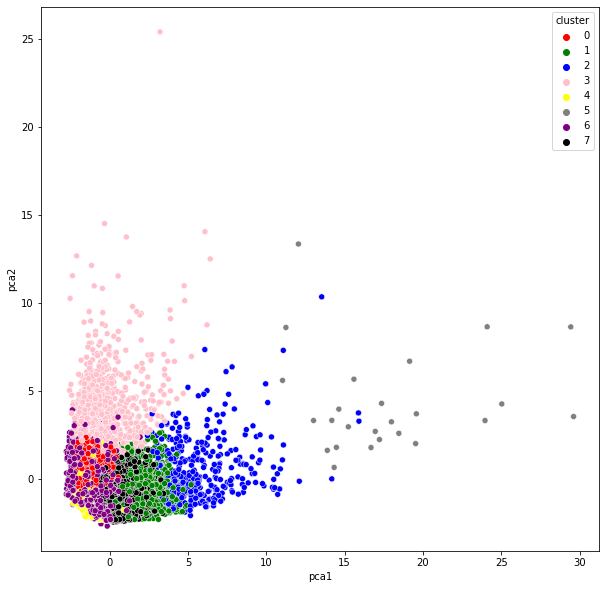

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = bd_pca, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']);

<h1> Aplicação d Autoencoders<h1/>

In [ ]:
# Vamos reduzir de 18 atributos para 10
# Aplicar o Elbow
# Aplicar K-means
# Aplicar PCA

In [42]:
bd_cartao_escalonado.shape

(8950, 17)

In [43]:
# Criando o Auto encoder
# Sequencia para as quantidades de neuronios
#  17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17 (valores aleatórios, testados antes pra ver quais os melhores valores)

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [50]:
bd_entrada = Input(shape = (17,))
x = Dense (500, activation = 'relu')(bd_entrada)
x = Dense (2000, activation = 'relu') (x)

encoded = Dense(10, activation = 'relu') (x)

x = Dense(2000, activation = 'relu') (encoded)
x = Dense(500, activation = 'relu') (x)

decoded = Dense(17) (x)

In [51]:
# autoencoder
autoencoder = Model(bd_entrada, decoded)

In [52]:
# encoder
encoder = Model(bd_entrada, encoded)

In [55]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

In [56]:
autoencoder.fit(bd_cartao_escalonado, bd_cartao_escalonado, epochs = 50)

Epoch 1/50
280/280 [==============================] - 9s 24ms/step - loss: 0.3335
Epoch 2/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0822
Epoch 3/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0616
Epoch 4/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0356
Epoch 5/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0446
Epoch 6/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0436: 0s - los
Epoch 7/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0336
Epoch 8/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0397: 0
Epoch 9/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0447
Epoch 10/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0267: 0
Epoch 11/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0232
Epoch 12/50
280/280 [==============================] - 7s 26ms/step - loss: 0.02

In [57]:
bd_cartao_escalonado.shape

(8950, 17)

In [59]:
compactar = encoder.predict(bd_cartao_escalonado)

In [60]:
compactar.shape

(8950, 10)

In [61]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compactar)
  wcss_2.append(kmeans.inertia_)

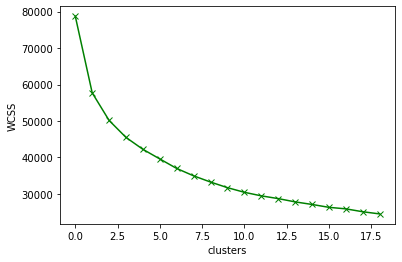

In [62]:
plt.plot(wcss_2, 'gx-')
plt.xlabel('clusters')
plt.ylabel('WCSS');

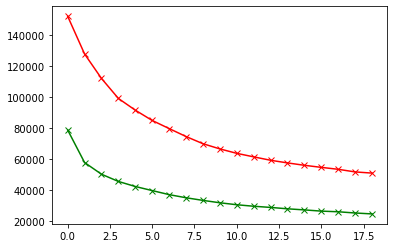

In [63]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [65]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compactar)

KMeans(n_clusters=4)

In [66]:
labels = kmeans.labels_
labels, labels.shape

(array([2, 0, 2, ..., 0, 0, 0]), (8950,))

In [67]:
bd_cluster_autoEncoder = pd.concat([bd_cartao, pd.DataFrame({'cluster': labels})], axis=1)
bd_cluster_autoEncoder.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [68]:
# Aplicando o PCA novamente
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compactar)
bd_pca = pd.DataFrame(data = bd_pca, columns = ['pca1', 'pca2'])
bd_pca.head()

,pca1,pca2
0,-1.682225,-1.076459
1,-1.138304,2.506461
2,0.969676,-0.383567
3,-0.873611,0.043204
4,-1.599445,-0.688603


In [69]:
bd_pca = pd.concat([bd_pca, pd.DataFrame({'cluster': labels})], axis = 1)
bd_pca.head()

,pca1,pca2,cluster
0,-1.682225,-1.076459,2
1,-1.138304,2.506461,0
2,0.969676,-0.383567,2
3,-0.873611,0.043204,0
4,-1.599445,-0.688603,2


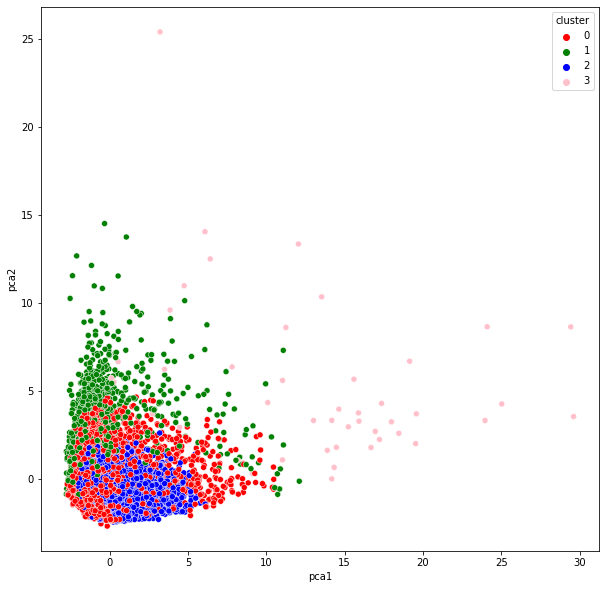

In [71]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = bd_pca, palette = ['red', 'green', 'blue', 'pink']);

In [73]:
# ordenando os valores
bd_ordenado = bd_cluster_autoEncoder.sort_values(by = 'cluster')
bd_ordenado.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4474,5256.695330,1.000000,188.60,188.6,0.00,1934.418697,0.083333,0.083333,0.000000,0.333333,4,1,9000.0,1421.954639,1452.249653,0.00,12,0
4400,1961.246269,1.000000,0.00,0.0,0.00,233.246267,0.000000,0.000000,0.000000,0.400000,4,0,2000.0,422.017882,415.210454,0.00,10,0
4401,0.000000,0.000000,18.77,0.0,18.77,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,864.206542,0.00,12,0
4405,12.597034,0.181818,99.00,99.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,96.255421,13.606460,0.00,12,0
4407,14.281926,0.875000,245.85,0.0,245.85,0.000000,0.875000,0.000000,0.750000,0.000000,0,16,1500.0,209.736381,65.920948,0.25,8,0


In [74]:
# mostrando os ultimos valores
bd_ordenado.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
970,3108.393701,0.9,26582.34,15158.90,11423.44,0.000000,0.9,0.800000,0.8,0.000000,0,55,28000.0,26557.09724,586.029097,0.875000,10,3
1604,3391.702180,1.0,38902.71,33803.84,5098.87,0.000000,1.0,1.000000,1.0,0.000000,0,195,18000.0,35843.62593,716.027656,1.000000,12,3
645,1482.235539,1.0,14604.87,2475.93,12128.94,0.000000,1.0,0.583333,1.0,0.000000,0,219,15500.0,14462.63056,340.717801,1.000000,12,3
1560,2774.249582,1.0,21802.60,21802.60,0.00,1771.824164,1.0,1.000000,0.0,0.083333,4,72,13000.0,22350.29247,562.887574,0.916667,12,3
1585,8809.504736,1.0,25378.36,20646.07,4732.29,0.000000,1.0,1.000000,1.0,0.000000,0,136,14500.0,25825.32482,2921.628286,0.000000,12,3


In [75]:
# Salvando o novo dataframe em formato de tabelo Excel
bd_ordenado.to_excel('novo_banco_ordenado.xls')